### Week 3 Challenge

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('desafio1.csv')

In [3]:
data.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


#### Checking correlation between features

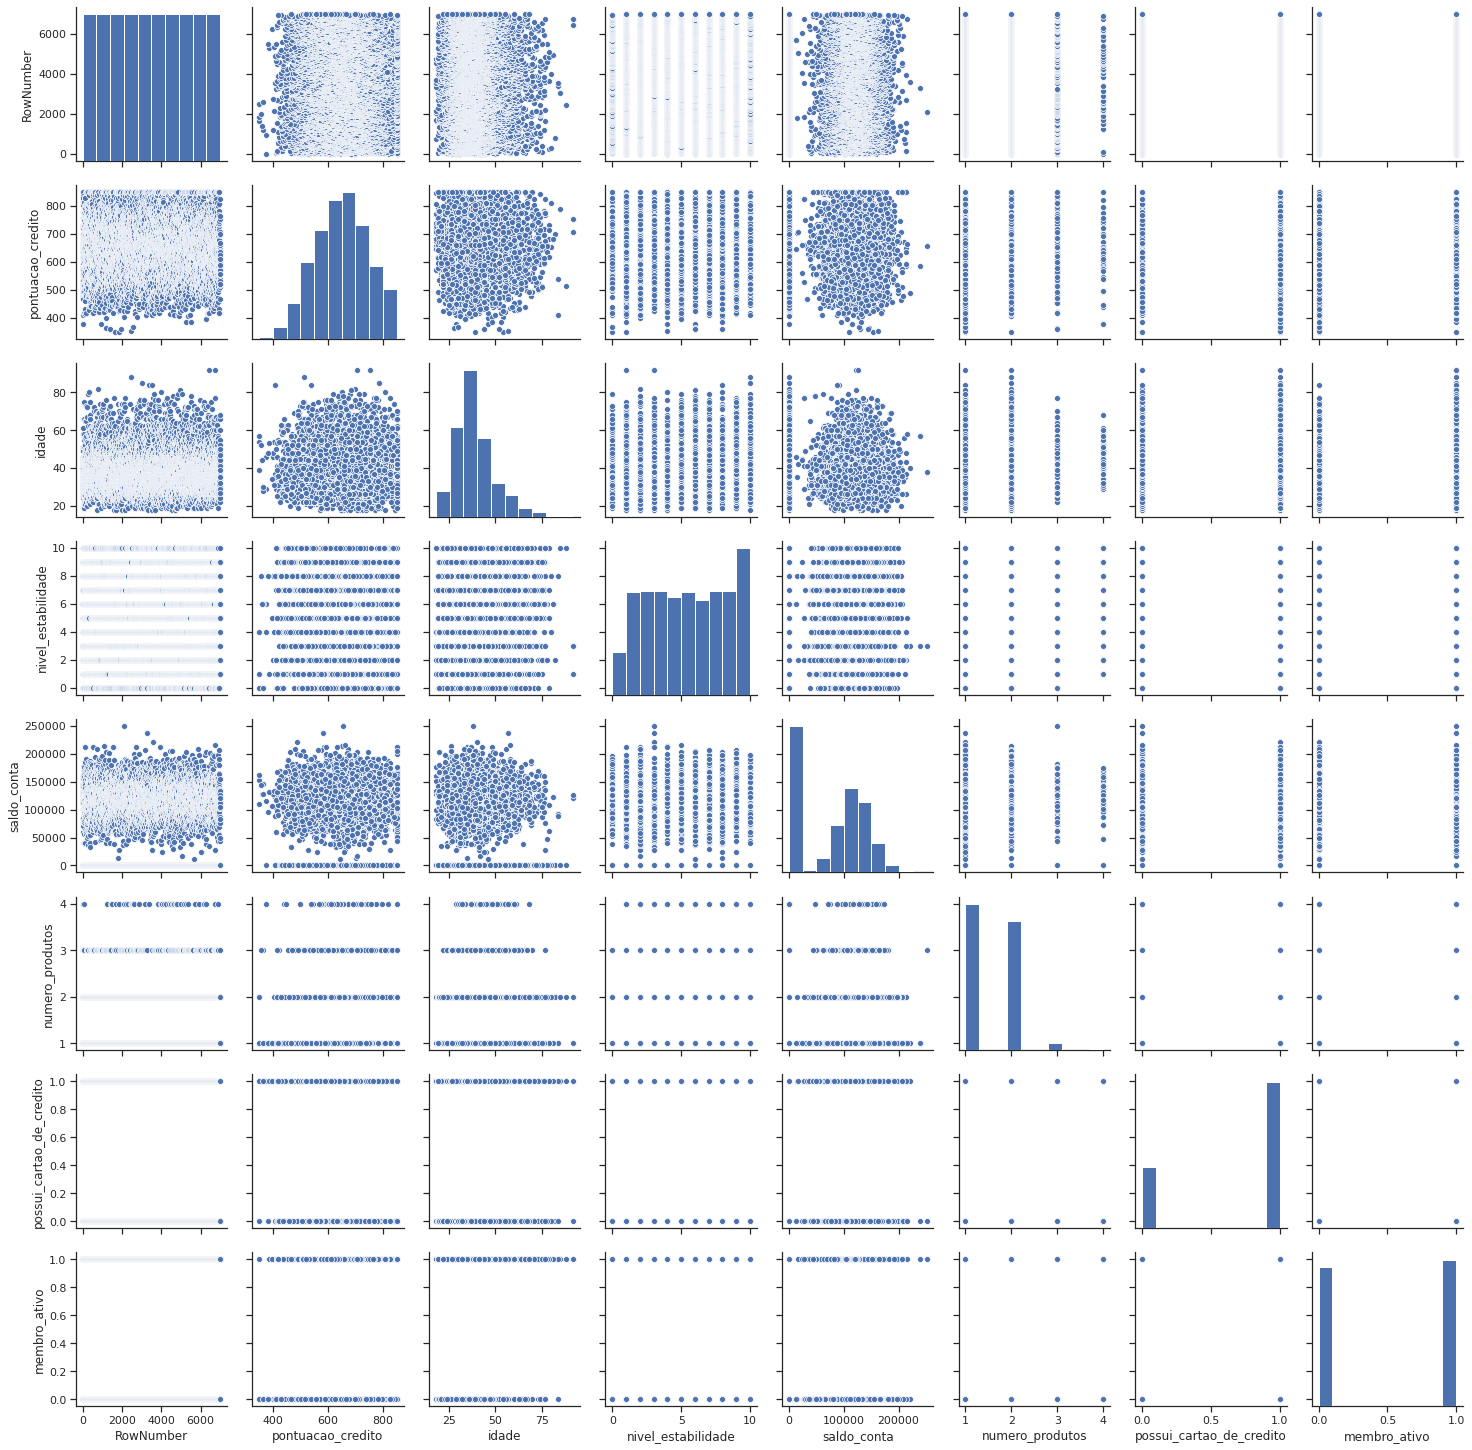

In [4]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data);

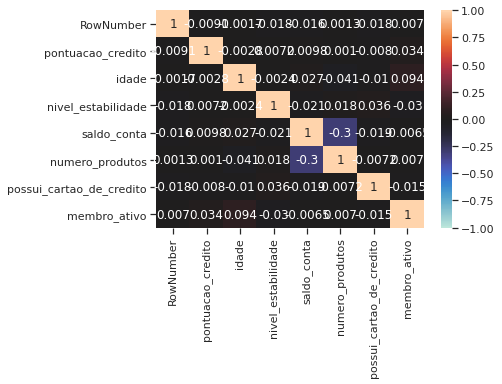

In [5]:
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0);

- What is the correlation between credit score and account balance?

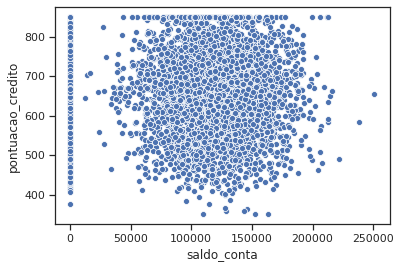

In [7]:
sns.scatterplot(x='saldo_conta', y='pontuacao_credito', data=data)

In [8]:
data[['saldo_conta', 'pontuacao_credito']].corr()

,saldo_conta,pontuacao_credito
saldo_conta,1.000000,0.009761
pontuacao_credito,0.009761,1.000000


- Checking clients residence place

In [9]:

data.estado_residencia.nunique()

3

In [10]:
data.estado_residencia.unique()

array(['SC', 'RS', 'PR'], dtype=object)

In [11]:
data.estado_residencia.value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

- Computing information about credit punctuation

In [12]:
credit_score = data.groupby('estado_residencia').agg({
    'pontuacao_credito' : ['mean', 'median', pd.Series.mode, 'std']
})

In [13]:
challenge_answer = credit_score['pontuacao_credito']

In [14]:
challenge_answer = challenge_answer.rename(columns={
    'mode' : 'moda',
    'median' : 'mediana',
    'mean' : 'media',
    'std' : 'desvio_padrao'
})

In [15]:
challenge_answer

,media,mediana,moda,desvio_padrao
estado_residencia,,,,
PR,648.961294,650,850,98.607186
RS,651.105143,650,850,95.136598
SC,649.537653,653,850,97.233493


In [16]:
challenge_answer.to_json('submission.json', orient='index')